# PCA

**Principal Component Analysis (PCA) (Temel Bileşen Analizi)**

Temel fikir, çok değişkenli verinin ana özelliklerini daha az sayıda değişken/bileşen ile temsil etmeye çalışmaktır. 

Örneğin; elimizde 100 adet değişken olduğunu düşünelim. Bu 100 değişkenin taşıdığı bir bilgi var. Bu 100 değişkenin taşıdığı bilgiyi daha az sayıda değişken yani bileşen ile temsil etmeye çalışıyoruz. 

Diğer bir ifade ile küçük bir miktar bilgi kaybını göze alarak değişken boyutunu azaltmaya çalışıyoruz. 

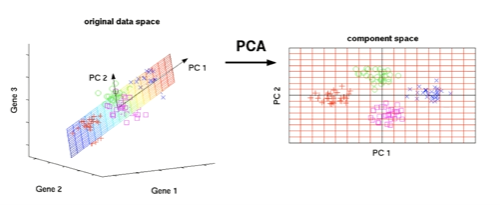

Oluşabilecek bilgi kaybının görecek küçük ve gürültü (noise) kıyaslanabilir düzeyde küçük olmasını bekliyoruz.

Bilgi; veri seti içerisindeki toplam değişkenliği ifade eder.

Görselde orijinal veride 3 boyut söz konusu. Burada istatistiksel bir teknik olan PCA ile 3 boyuttan 2 boyuta indirgemiş oluyoruz.

PCA genel olarak, görüntü işleme ve regresyon modellerinde ortaya çıkan bazı problemlerde kullanılmaktadır. Özellikle regresyon modellerinde veri setinde çok fazla değişken olduğunda, değişkenlerden bazıları birbiri ile ilişkili ise ortaya multicollinearity problemi çıkmaktadır. 

Bu multicollinearity probleminden kurtulmak için bir PCA uygulandığında değişkenler arasındaki multicollinearity ortadan kaldırılabilir. PCA işleminden sonra ortaya çıkan bileşenler arasında korelasyon yoktur.

Sonuç olarak machine learning çalışmalarında elimizdeki veriyi yani tüm değişkenleri, ana özellikleri koruyarak daha az sayıda değişene bileşene indirgemek istediğimizde PCA yı kullanıyoruz.İndirgeme işleminden sonra ortaya çıkan bileşenler arasında korelasyon bulunmamaktadır. 

Teknik olarak, arka planda, çok boyutlu bir veri seti daha az sayıda bileşene indirgeniyor. Bu bileşenlere ait korelasyon ve kovaryans matrislerinin öz değer ve öz vektörlerinin bulunması aracılığı ile gerçekleştiriliyor.

Değişken gruplarının varyanslarını ifade eden öz değerler ile veri setindeki değişkenler gruplandırılıyor. Gruplar arasında en fazla varyansa sahip gruplar en önemli gruplar oluyor. Bu gruplara Temel Bileşen diyoruz.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df = pd.read_csv("Hitters.csv")
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  322 non-null    object 
dtypes: float64

In [7]:
df.shape

(322, 20)

In [13]:
df.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
count,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.00000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,263.000000
mean,380.928571,101.024845,10.770186,50.909938,48.027950,38.742236,7.444099,2648.68323,717.571429,69.490683,358.795031,330.118012,260.239130,288.937888,106.913043,8.040373,535.925882
std,153.404981,46.454741,8.709037,26.024095,26.166895,21.639327,4.926087,2324.20587,654.472627,86.266061,334.105886,333.219617,267.058085,280.704614,136.854876,6.368359,451.118681
min,16.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.00000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.500000
25%,255.250000,64.000000,4.000000,30.250000,28.000000,22.000000,4.000000,816.75000,209.000000,14.000000,100.250000,88.750000,67.250000,109.250000,7.000000,3.000000,190.000000
50%,379.500000,96.000000,8.000000,48.000000,44.000000,35.000000,6.000000,1928.00000,508.000000,37.500000,247.000000,220.500000,170.500000,212.000000,39.500000,6.000000,425.000000
75%,512.000000,137.000000,16.000000,69.000000,64.750000,53.000000,11.000000,3924.25000,1059.250000,90.000000,526.250000,426.250000,339.250000,325.000000,166.000000,11.000000,750.000000
max,687.000000,238.000000,40.000000,130.000000,121.000000,105.000000,24.000000,14053.00000,4256.000000,548.000000,2165.000000,1659.000000,1566.000000,1378.000000,492.000000,32.000000,2460.000000


In [14]:
df.isnull().sum()

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

In [15]:
df.dropna(inplace=True)

In [16]:
df = df._get_numeric_data()
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,750.0


pca.components_ : [[ 0.19506377  0.19410007  0.19690453  0.19491272  0.22956638  0.20673717
   0.271085    0.31970454  0.32077315  0.30810145  0.32761493  0.32977446
   0.30573146  0.08303783  0.00159189 -0.00529271  0.24914187]
 [-0.38407792 -0.37764493 -0.22866298 -0.37459128 -0.31026531 -0.23115759
   0.26820405  0.19641268  0.18589726  0.13386448  0.17692929  0.17283361
   0.19698297 -0.16295204 -0.17624626 -0.20978299 -0.05452611]]
pca.explained_variance_ratio_ : [0.45245466 0.24246801 0.1016968 ]


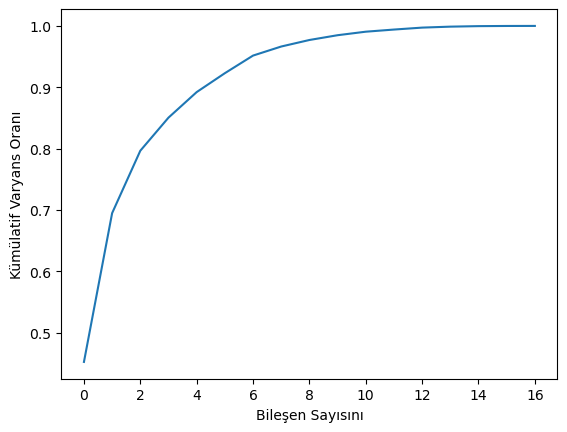

In [23]:
from sklearn.preprocessing import StandardScaler

df = StandardScaler().fit_transform(df)
# PCA ya geçmeden önce Standard Scaler ile scale yapmamız gerekli

from sklearn.decomposition import PCA
# PCA yı import etmeliyiz

pca = PCA(n_components = 2)
pca_fit = pca.fit_transform(df)
# Öncelikle örnek olarak 2 bileşenli bir PCA yapmak istiyoruz

bilesen_df = pd.DataFrame(data = pca_fit, columns = ["birinci_bilesen","ikinci_bilesen"])
# Oluşturduğumuz pca yı df haline getirerek görüntülüyoruz.
# Orijinal veri setini 2 bileşene indirgemiş oluyoruz.
# Diğer bir ifade ile başlangıç veri setinin taşıdığı bilgiyi yani varyansı 2 değişken ile temsil edebilir duruma geliyoruz.
# Bazı bilgi kayıplarını göze alarak bunu gerçekleştirdik.

pca.explained_variance_ratio_
# Oluşturulan pca ile açıklanan varyans ı görüntüyoruz.
# Bileşenlerce veri setinin içerisinde bulunan değişkenliğin varyansını görebiliriz.
# Bileşenlerin toplan varyansı ile veri setinin ne kadarının oluşturduğumuz değişkenlerce açıklanabildiğini görebiliriz.
# Başlangıç veri setindeki 20 değişkence açıklanabilen bilginin ne kadarını pca ile oluşturduğumuz değişkenlerce açıklayabiliyoruz.

# belirli bir bilgi kaybının olması göze alınabilir.

print("pca.components_ :", pca.components_)
# bu şekilde bileşenlere ulaşabiliriz. Kaç tane bileşen varsa indexleme ile [] ayrı ayrı da görüntüleyebiliriz.

# Başlangıçta n_components = 2 olarak belirlenmişti.
# n_components değerini değiştirerek açıklanabilen varyansta meydana gelen değişikliği karşılaştırabilir ve uygun n_components değerini belirleyebiliriz.

#optimum bilesen sayisi
pca = PCA().fit(df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Bileşen Sayısını")
plt.ylabel("Kümülatif Varyans Oranı");
# Bu şekilde optimum bileşen sayısına karar verebiliriz.
# Başlangıçta n_components 2 olarak belirlemiş ve 2 adet değişken-bileşen oluşturmuştuk
# Burada n_components sayısı belirlemeden fit işlemi yapıyoruz ve başlangıçtaki değişken sayısı kadar bileşen oluşturuyoruz.
# Plotlama yaptığımızda kümülatif olarak değişken saysına göre varyans ı görebiliriz.
# Aşağıda görseli olan plotlamaya göre bileşen sayısı arttıkça veri seti içerisindeki varyansın yani bilginin açıklanma oranı artmaktadır.

pca.explained_variance_ratio_
# Optimum bileşen sayısını belirlemek için oluşturduğumuz pca ile kümülatif olarak açıklanan varyans ı görüntüyoruz.
# Burada bileşen sayısı arttıkça varyansın da arttığı gözlemlenecektir.
# Ne kadarlık bir varyansa sahip olacağız, ne kadarlık bir bilgi kaybına razı olacağımıza karar veriyoruz.
# Bu karara göre hangi bileşen sayısı ile devam edeceksek o bileşen ile final pca yı oluşturuyoruz.

#final
pca = PCA(n_components = 3)
pca_fit = pca.fit_transform(df)
# Örneğin bileşen sayısına 3 olarak karar vermiş olalım. Bu değerle final modelimizi oluşturuyoruz.

print("pca.explained_variance_ratio_ :", pca.explained_variance_ratio_)
# Oluşturulan pca ile açıklanan varyans ı görüntüyoruz.
# Bileşenlerce veri setinin içerisinde bulunan değişkenliğin varyansını görebiliriz.
# Bileşenlerin toplan varyansı ile veri setinin ne kadarının oluşturduğumuz değişkenlerce açıklanabildiğini görebiliriz.
# Başlangıç veri setindeki 20 değişkence açıklanabilen bilginin ne kadarını pca ile oluşturduğumuz değişkenlerce açıklayabiliyoruz